### Initialization

In [32]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [33]:
# constants


In [34]:
# measured data

# concentration
con = np.array([0.1204,0.0602,0.0387,0.0293,0.0236,0])
Δcon =np.array([0,0.0037,0.0016,0.0009,0.0006,0])
       
# calibration
data_cal = [[],[]]
for line in open('data/1cal'):
    try:
        d = line.replace('\n','').split('\t')
        data_cal[0].append(float(d[0]))
        data_cal[1].append(float(d[1]))
    except ValueError: 
        pass
        #print(line)
data_cal = np.array(data_cal)

# T1
data_1 = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
for i in range(6):  
    for line in open('data/t1prob%d'%i):
        try:
            d = line.replace('\n','').split('\t')
            data_1[i][0].append(float(d[0]))
            data_1[i][1].append(float(d[1]))
        except ValueError: 
            pass
            #print(line)
data_1 = np.array(data_1)

# T2
data_2 = [[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]
for i in range(6):  
    for line in open('data/t2prob%d'%i):
        try:
            d = line.replace('\n','').split('\t')
            data_2[i][0].append(float(d[0]))
            data_2[i][1].append(int(d[1]))
            data_2[i][2].append(int(d[2]))
        except ValueError: 
            pass
            #print(line)
data_2 = np.array(data_2)

# change of RD
RD = []
data_3 = [[[],[]],[[],[]],[[],[]]]
i = 0
for line in open('data/tau900.txt'):
    d = line.replace('\n','').split('\t')
    try:
        data_3[i][0].append(float(d[0]))
        data_3[i][1].append(float(d[1]))
        i += 1
    except (ValueError,IndexError): 
        RD.append(int(d[1]))
        i = 0
data_3 = np.array(data_3)
RD = np.array(RD)

# change of TAU
TAU = []
data_4 = [[[],[]],[[],[]],[[],[]]]
i = 0
for line in open('data/rd1600000.txt'):
    d = line.replace('\n','').split('\t')
    try:
        data_4[i][0].append(float(d[0]))
        data_4[i][1].append(float(d[1]))
        i += 1
    except (ValueError,IndexError): 
        TAU.append(int(d[1]))
        i = 0
data_4 = np.array(data_4)
TAU = np.array(TAU)

In [35]:
#data_4

In [36]:
# theoretical functions
#def exp(a,b)

### Calibration

In [37]:
# calculations
fun1 = lambda x,a,b,c: 10**7*a*np.exp(b*10**5*x)*abs(np.sin(c*10**5*x))


opt1,cov1 = curve_fit(fun1,data_cal[0],data_cal[1])#,sigma=0.1*10**7)#data_cal[1])

x_err = 0.0092 *10**-5
y_err = 0.094 *10**7
sigma = np.sqrt(y_err**2 + (x_err *10**5* 10**7*opt1[0]*np.exp(opt1[1]*10**5*data_cal[0])*(
    opt1[1]*abs(np.sin(opt1[2]*10**5*data_cal[0])) 
    + opt1[2]*abs(np.cos(opt1[2]*10**5*data_cal[0])) ))**2)
print(sigma)
opt,cov = curve_fit(fun1,data_cal[0],data_cal[1],sigma=sigma,absolute_sigma=True)
err = np.sqrt(np.diag(cov))

χ2 = sum([(data_cal[1][i]-fun1(data_cal[0][i],*opt))**2/sigma[i]**2 
          for i in range(len(data_cal[0]))])/(len(data_cal[0]-3))
print(opt,cov,'\n\n\n',χ2)
soe1 = np.pi/(2*opt[2]*10**5)
dsoe1 = soe1*err[2]/opt[2]
soe2 = np.pi/(opt[2]*10**5)
dsoe2 = soe2*err[2]/opt[2]

[ 970460.68235055  965821.58587842  958680.48570412  950849.39879278
  944273.91779782  940529.82125968  940030.27454137  942219.77827169
  947157.68706489  953358.99096498  959102.46763776  962894.39968577
  963587.60719487  960499.57835088  955293.27740871  949301.64636559
  944020.40669148  940720.40854268  940003.77352631  941206.21067882]
[ 2.65575289 -0.04339147  1.00004518] [[  4.31943623e-03  -4.69480421e-04   1.46153362e-05]
 [ -4.69480421e-04   6.78600180e-05  -4.65011915e-06]
 [  1.46153362e-05  -4.65011915e-06   2.72134587e-05]] 


 0.991942303511


In [38]:
def fun2(x_err = 0.06 *10**-5,y_err = 0.095 *10**7):
    sigma = np.sqrt(y_err**2 + (x_err *10**5* 10**7*opt1[0]*np.exp(opt1[1]*10**5*data_cal[0])*( 
        opt1[1]*abs(np.sin(opt1[2]*10**5*data_cal[0])) 
        + opt1[2]*abs(np.cos(opt1[2]*10**5*data_cal[0])) ))**2)

    return sum([(data_cal[1][i]-fun1(data_cal[0][i],*opt1))**2/sigma[i]**2 
          for i in range(len(data_cal[0]))])/(len(data_cal[0]-3))

In [39]:
# test x and y error

#fig,ax = plt.subplots(figsize=(10,6))
#x = np.linspace(0.0,0.1,500)*10**-5
#y = np.linspace(0.0,0.1,500)*10**7
#some=[]
#for xi in x[350:]:
#    ax.plot(y,[fun2(xi,yi) for yi in y],label='x = %f'%(xi*10**5))
#    ax.set_ylim(0.5,1.1)
#    ax.set_xlim(200000,400000)
#    ax.legend()
#    ax.axhline(1)
#    arg = np.argmin(np.array([abs(fun2(xi,yi)-1) for yi in y]))
#    ax.axvline(y[arg])
#    some.append((xi/3*10**5)**2 + (y[arg]/1.2*10**-7)**2)
#some = np.array(some)
#print(some)
#print(min(some),x[np.argmin(some)],y[np.argmin(np.array([abs(fun2(x[np.argmin(some)],yi)-1) for yi in y]))])

[ 2.65575289 -0.04339147  1.00004518] 
 [ 0.06572242  0.00823772  0.00521665]
1.57072535902e-05 8.19355748034e-08 
 3.14145071804e-05 1.63871149607e-07


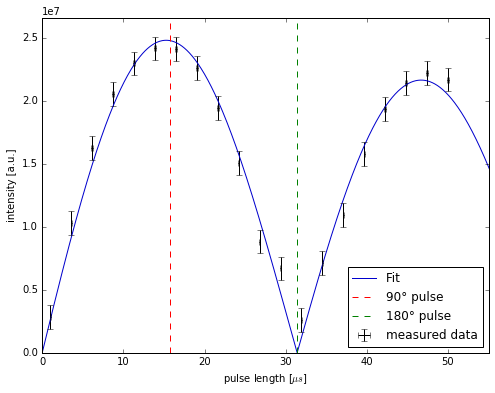

In [40]:
# plots
fig,ax = plt.subplots(figsize=(8,6))
x = np.linspace(0,6,1000)*10**-5
ax.plot(x*10**6,fun1(x,*opt),'mediumblue',label='Fit')
ax.axvline(soe1*10**6,ls='--',label='90° pulse',c='red')
ax.axvline(soe2*10**6,ls='--',label='180° pulse',c='g')
ax.errorbar(data_cal[0]*10**6,data_cal[1],ecolor='k',yerr=y_err,xerr=x_err*10**6,fmt='None',label='measured data')
ax.set_xlim(0,max(data_cal[0])*1.1*10**6)
ax.set_ylim(0,max(data_cal[1])*1.1)
ax.set_xlabel('pulse length [$\mu s$]')
ax.set_ylabel('intensity [a.u.]')
ax.legend(loc=0)

#fig.savefig('cal.pdf')

print(opt,'\n',err)
print(soe1,dsoe1,'\n',soe2,dsoe2)

### T1

In [41]:
def fun3(t,M0,T1,t0):
    return M0*10**7*abs(1-2*np.exp((-t*10**2-t0)/T1))

#x_err = 0.02 *10**-5
#y_err = 0.06 *10**7

t1_es =[.8,1.8,2.8,5.7,6.1,247]

opt_T1 = np.zeros([6,3])
cov_T1 = np.zeros([6,3,3])
err_T1 = np.zeros([6,3])
χ2_T1 = np.zeros(6)
sigma_T1 = np.array([np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(35),np.zeros(30)])

for i in range(len(data_1)):
    opt_T1[i],cov_T1[i] = curve_fit(fun3,data_1[i][0][:-1],data_1[i][1][:-1],p0=[3,t1_es[i],0])
    
    sigma_T1[i] = np.sqrt(y_err**2 + (x_err *10**2* 10**7*opt_T1[i][0]/opt_T1[i][1]*2*np.exp(
        -(opt_T1[i][2]+10**2*np.array(data_1[i][0]))/opt_T1[i][1]))**2)
    
    opt_T1[i],cov_T1[i] = curve_fit(fun3,data_1[i][0][:-1],data_1[i][1][:-1],
                                    sigma=sigma_T1[i][:-1],absolute_sigma=True,p0=[3,t1_es[i],0])
    err_T1[i] = np.sqrt(np.diag(cov_T1[i]))

    χ2_T1[i] = sum([(data_1[i][1][j]-fun3(data_1[i][0][j],*opt_T1[i]))**2/sigma_T1[i][j]**2 
          for j in range(len(data_1[i][0])-1)])/(len(data_1[i][0])-3-1)

print(opt_T1,err_T1,χ2_T1)

[[  2.32207693e+00   8.99244260e-01   6.56821442e-02]
 [  3.71846459e+00   1.81942124e+00   1.80689207e-02]
 [  3.81478807e+00   3.04074195e+00   1.37881270e-01]
 [  3.17554423e+00   6.03870349e+00   2.37062720e-01]
 [  3.39113730e+00   6.33434759e+00   1.62483466e-01]
 [  3.70629711e+00   2.84565865e+02   2.14626643e+01]] [[  0.04199212   0.03441707   0.01989284]
 [  0.04226762   0.04087253   0.02224701]
 [  0.04514956   0.07033662   0.03913238]
 [  0.04871887   0.17141268   0.09382908]
 [  0.0264867    0.11985362   0.07080706]
 [  0.11137711  10.4007012    5.85672903]] [ 0.56232748  1.20098653  1.54145167  0.16279104  0.07525926  0.13245751]


In [42]:
T1 = np.rollaxis(opt_T1,0,2)[1]*10 # ms
ΔT1 = np.rollaxis(err_T1,1)[1]*10 # ms
print(T1,ΔT1)

[    8.9924426     18.19421244    30.40741946    60.38703487    63.34347589
  2845.65864746] [   0.34417069    0.40872531    0.70336616    1.71412677    1.19853621
  104.00701197]


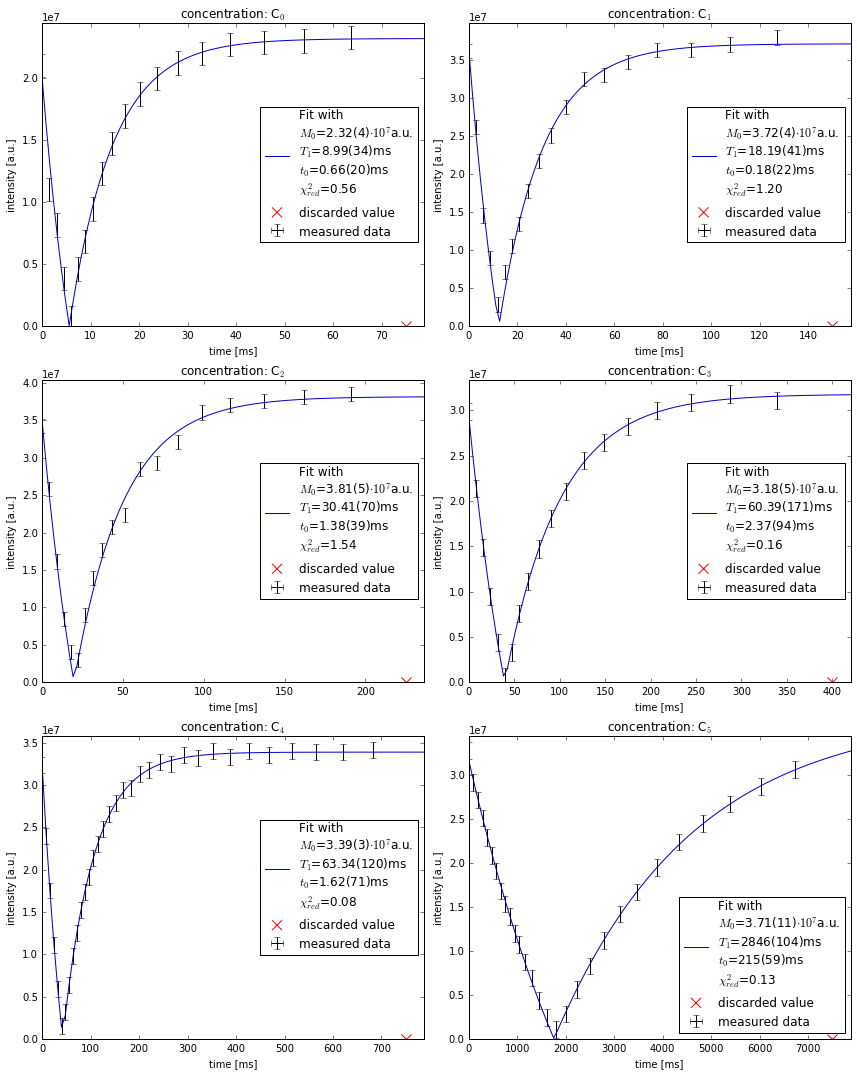

In [43]:
fig,ax = plt.subplots(3,2,figsize=(6*2,5*3))

for i in range(len(data_1)):
    x =np.linspace(0,max(data_1[i][0])*1.05,100)
    if i==5:
        ax[i//2][i%2].plot(10**3*x,fun3(x,*opt_T1[i]),'mediumblue',label="""Fit with
$M_0$=%.2f(%.0f)$\cdot10^7$a.u.
$T_1$=%.0f(%.0f)ms
$t_0$=%.0f(%.0f)ms
$\chi^2_{red}$=%.2f"""
                   %(opt_T1[i][0]*10**0,err_T1[i][0]*10**2,opt_T1[i][1]*10**1,
                    err_T1[i][1]*10**1,opt_T1[i][2]*10**1,err_T1[i][2]*10**1,χ2_T1[i]))
    else:
        ax[i//2][i%2].plot(10**3*x,fun3(x,*opt_T1[i]),'mediumblue',label="""Fit with
$M_0$=%.2f(%.0f)$\cdot10^7$a.u.
$T_1$=%.2f(%.0f)ms
$t_0$=%.2f(%.0f)ms
$\chi^2_{red}$=%.2f"""
                   %(opt_T1[i][0]*10**0,err_T1[i][0]*10**2,opt_T1[i][1]*10**1,
                    err_T1[i][1]*10**3,opt_T1[i][2]*10**1,err_T1[i][2]*10**3,χ2_T1[i]))
    ax[i//2][i%2].errorbar(10**3*np.array(data_1[i][0][:-1]),data_1[i][1][:-1],yerr=y_err,xerr=10**3*x_err,
                   fmt='none',ecolor='k',label='measured data')
    ax[i//2][i%2].scatter(10**3*np.array(data_1[i][0][-1]),data_1[i][1][-1],s=100,marker='x',c='r',label='discarded value')
    
    ax[i//2][i%2].set_xlim(0,max(data_1[i][0])*1.05*10**3)
    ax[i//2][i%2].set_ylim(0,max(data_1[i][1])*1.05)
    ax[i//2][i%2].set_xlabel('time [ms]')
    ax[i//2][i%2].set_ylabel('intensity [a.u.]')
    ax[i//2][i%2].legend(loc=5-i//5)
    ax[i//2][i%2].set_title('concentration: C$_%d$'%i)
fig.tight_layout()
#fig.savefig('T1.pdf')

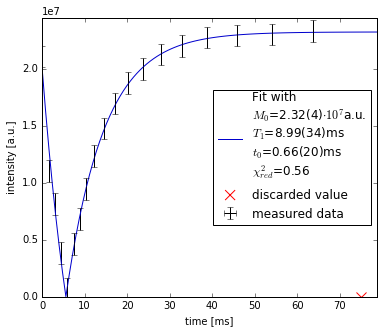

In [44]:
fig,ax = plt.subplots(figsize=(6,5))
i=0
x =np.linspace(0,max(data_1[i][0])*1.05,100)
ax.plot(10**3*x,fun3(x,*opt_T1[i]),'mediumblue',label="""Fit with
$M_0$=%.2f(%.0f)$\cdot10^7$a.u.
$T_1$=%.2f(%.0f)ms
$t_0$=%.2f(%.0f)ms
$\chi^2_{red}$=%.2f"""
                   %(opt_T1[i][0]*10**0,err_T1[i][0]*10**2,opt_T1[i][1]*10**1,
                    err_T1[i][1]*10**3,opt_T1[i][2]*10**1,err_T1[i][2]*10**3,χ2_T1[i]))
ax.errorbar(10**3*np.array(data_1[i][0][:-1]),data_1[i][1][:-1],yerr=y_err,xerr=10**3*x_err,
                   fmt='none',ecolor='k',label='measured data')
ax.scatter(10**3*np.array(data_1[i][0][-1]),data_1[i][1][-1],s=100,marker='x',c='r',label='discarded value')
    
ax.set_xlim(0,max(data_1[i][0])*1.05*10**3)
ax.set_ylim(0,max(data_1[i][1])*1.05)
ax.set_xlabel('time [ms]')
ax.set_ylabel('intensity [a.u.]')
ax.legend(loc=5-i//5)

#fig.savefig('T1_c0.pdf')

In [45]:
def fun4(x,a,b):
    return a*x + b
opt2,cov2 = curve_fit(fun4,con[:-1],1/T1[:-1])
sigma2 = np.sqrt((ΔT1/T1**2)**2+(opt2[0]*Δcon)**2)
opt2,cov2 = curve_fit(fun4,con[:-1],1/T1[:-1],p0=[1,-0.005],sigma=(np.sqrt((ΔT1/T1**2)**2+(opt2[0]*Δcon)**2))[:-1],absolute_sigma =True)
err2 = np.sqrt(np.diag(cov2))
#print(opt2[1])
χ2_2 = sum([(1/T1[j]-fun4(con[j],*opt2))**2/sigma2[j]**2 
          for j in range(len(T1)-1)])/(len(T1)-3)
T10 = 1/opt2[1]
ΔT10 = err2[1] / opt2[1]**2
print(opt2,err2,'\n',T10,ΔT10,'\n',χ2_2)

[ 1.00213075 -0.00898784] [ 0.04020003  0.00126344] 
 -111.261428871 15.6402844837 
 6.92167969683


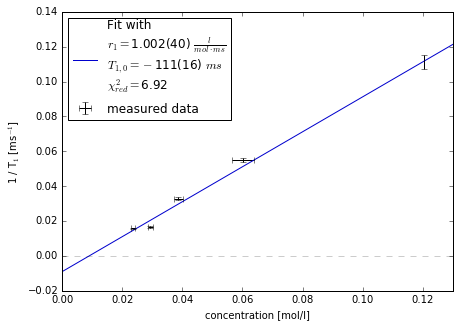

In [46]:
# plots
fig,ax = plt.subplots(figsize=(7,5))
x = np.linspace(-0.01,0.13,100)
ax.plot(x,fun4(x,*opt2),'mediumblue',label=r"""Fit with
$r_1=$%.3f(%.f) $\frac{l}{mol\cdot ms}$
$T_{1,0}=-$%.f(%.f) $ms$
$\chi^2_{red}=$%.2f"""%(opt2[0],err2[0]*10**3,-T10,ΔT10,χ2_2))
ax.errorbar(con[:-1],1/T1[:-1],ecolor='k',yerr=ΔT1[:-1]/T1[:-1]**2,xerr=Δcon[:-1],fmt='None',label='measured data')
ax.set_xlim(0,0.13)
ax.axvline(0,ls='--',c='k',alpha=0.2)
ax.axhline(0,ls='--',c='k',alpha=0.2)
#ax.set_ylim(0,max(data_cal[1])*1.1)
ax.set_xlabel('concentration [mol/l]')
ax.set_ylabel(r'1 / T$_1$ [ms$^{-1}$]')
ax.legend(loc=0)

#fig.savefig('T1vscon.pdf')

### T2

In [47]:
#fig,ax =plt.subplots(6,1,figsize=(8,40))
for i in range(6):
    #ax[i].plot(data_2[i][0],data_2[i][1],data_2[i][0],data_2[i][2])
    print(len(data_2[i][0]))

200
200
200
200
200
200


In [48]:
def fun5(t,M0,T2):
    return M0*10**5*np.exp((-t*10**2)/T2)

#x_err = 0.02 *10**-5
y_er = y_err * np.array([0.001,0.001,0.001,0.001,0.001,0.0001])
print(y_er)
t2_es =[.8,1.7,2.8,5,5.3,77]

opt_T2 = np.zeros([6,2])
cov_T2 = np.zeros([6,2,2])
err_T2 = np.zeros([6,2])
χ2_T2 = np.zeros(6)
sigma_T2 = np.zeros([6,200])

for i in range(len(data_2)):
    opt_T2[i],cov_T2[i] = curve_fit(fun5,data_2[i][0],data_2[i][1],p0=[-3*10**-(i//5),t2_es[i]])
    
    sigma_T2[i] = np.sqrt(y_er[i]**2 + (-x_err *10**2* 10**5*opt_T2[i][0]/opt_T2[i][1]*np.exp(
        -(10**2*np.array(data_2[i][0]))/opt_T2[i][1]))**2)
    
    opt_T2[i],cov_T2[i] = curve_fit(fun5,data_2[i][0],data_2[i][1],
                                    sigma=sigma_T2[i],absolute_sigma=True,p0=[-3*10**-(i//5),t2_es[i]])
    err_T2[i] = np.sqrt(np.diag(cov_T2[i]))

    χ2_T2[i] = sum([(data_2[i][1][j]-fun5(data_2[i][0][j],*opt_T2[i]))**2/sigma_T2[i][j]**2 
          for j in range(len(data_2[i][0]))])/(len(data_2[i][0])-3)

print(opt_T2,err_T2,χ2_T2)

[ 940.  940.  940.  940.  940.   94.]
[[ -2.68033584   0.76569372]
 [ -3.8194632    1.65480909]
 [ -3.75335655   2.82600232]
 [ -3.67932011   5.03614785]
 [ -3.65227147   5.30383526]
 [ -0.26112644  77.466589  ]] [[ 0.00597831  0.00226722]
 [ 0.00428265  0.00253708]
 [ 0.00395722  0.00410378]
 [ 0.00392822  0.00742694]
 [ 0.00541066  0.0106853 ]
 [ 0.00045974  0.18769287]] [ 0.12766233  0.37540004  0.75872726  1.83324644  1.30152731  6.84149657]


In [49]:
10**(1//5)

1

In [50]:
T2 = np.rollaxis(opt_T2,0,2)[1]*10 # ms
ΔT2 = np.rollaxis(err_T2,1)[1]*10 # ms
print(T2,ΔT2)

[   7.65693719   16.54809089   28.26002324   50.36147853   53.03835261
  774.66589004] [ 0.02267216  0.0253708   0.04103784  0.0742694   0.10685303  1.87692875]


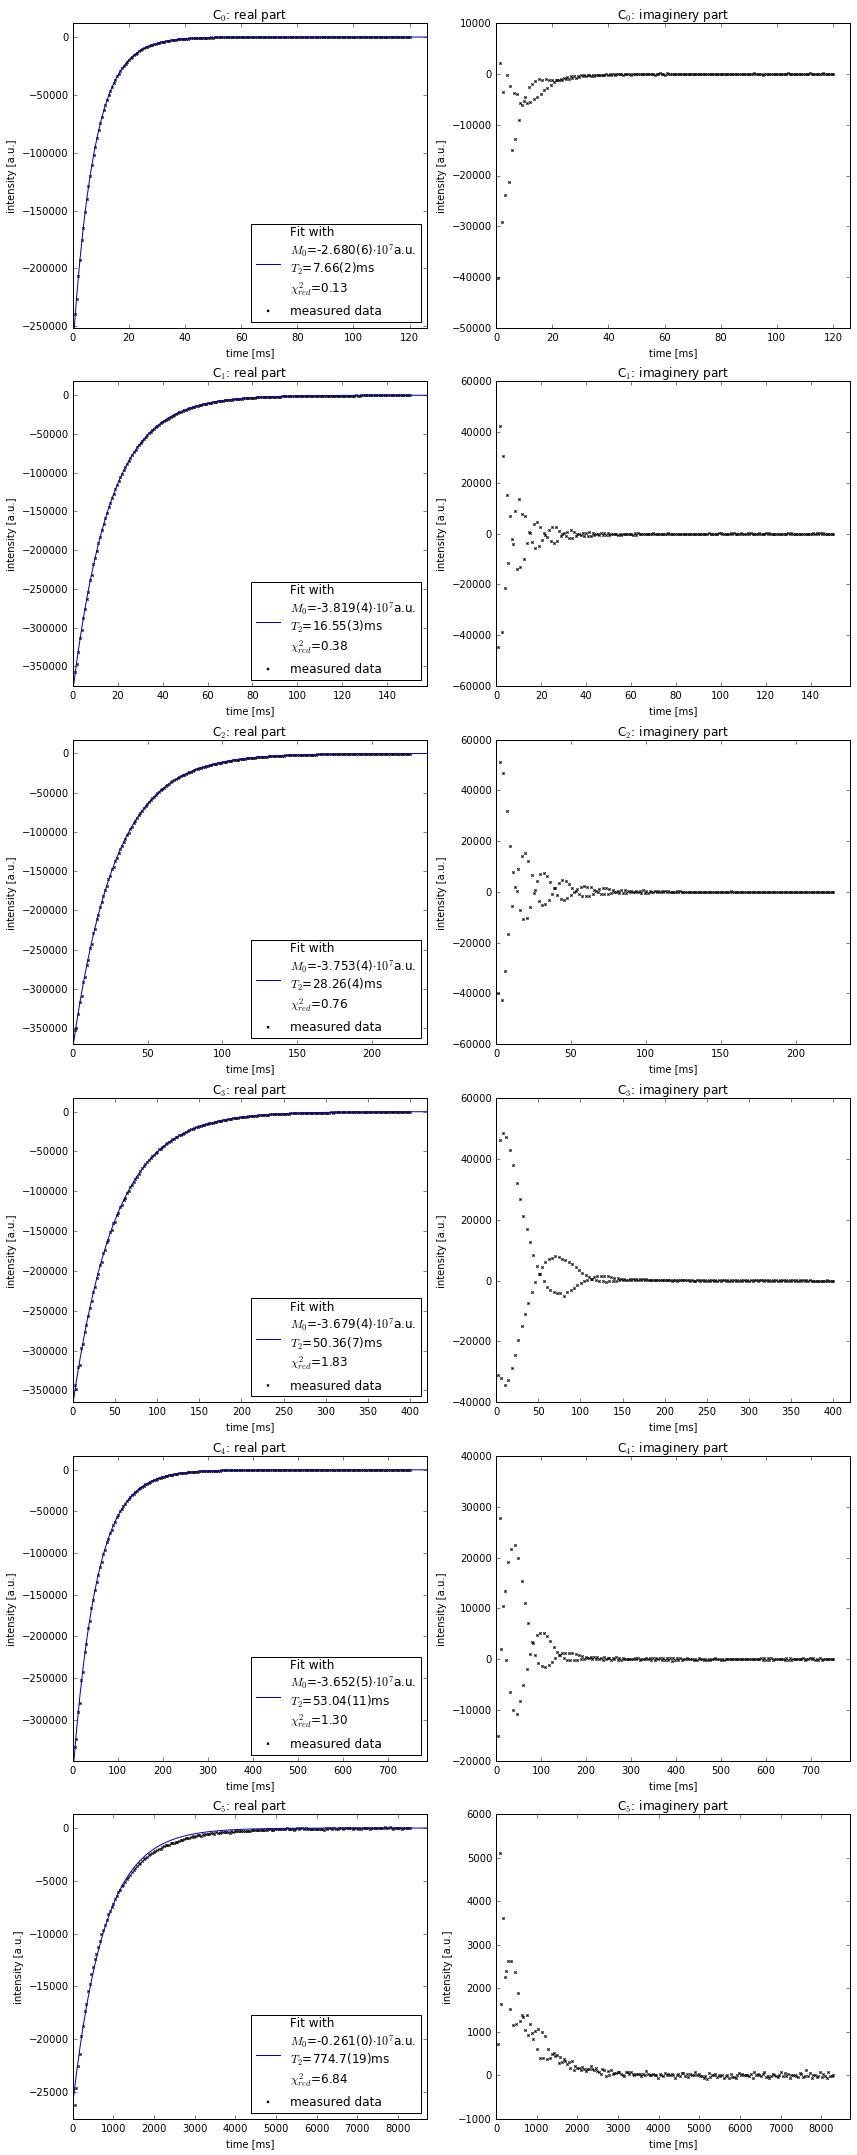

In [51]:
fig,ax = plt.subplots(6,2,figsize=(6*2,5*6))

for i in range(len(data_2)):
    x =np.linspace(0,max(data_2[i][0])*1.05,100)
    ax[i][0].scatter(10**3*np.array(data_2[i][0]),data_2[i][1],marker='x',c='k',label='measured data',s=5)
        
    if i==5:
        ax[i][0].plot(10**3*x,fun5(x,*opt_T2[i]),'mediumblue',label="""Fit with
$M_0$=%.3f(%.0f)$\cdot10^7$a.u.
$T_2$=%.1f(%.0f)ms
$\chi^2_{red}$=%.2f"""
            %(opt_T2[i][0]*10**0,err_T2[i][0]*10**3,opt_T2[i][1]*10**1,
            err_T2[i][1]*10**2,χ2_T2[i]))
    else:
        #ax[i//2][i%2].errorbar(10**3*np.array(data_2[i][0]),data_2[i][1],yerr=y_er,xerr=10**3*x_err,
        #               fmt='none',ecolor='k',label='measured data')
        ax[i][0].plot(10**3*x,fun5(x,*opt_T2[i]),'mediumblue',label="""Fit with
$M_0$=%.3f(%.0f)$\cdot10^7$a.u.
$T_2$=%.2f(%.0f)ms
$\chi^2_{red}$=%.2f"""
                   %(opt_T2[i][0]*10**0,err_T2[i][0]*10**3,opt_T2[i][1]*10**1,
                    err_T2[i][1]*10**3,χ2_T2[i]))
    ax[i][0].set_xlim(0,max(data_2[i][0])*1.05*10**3)
    ax[i][0].set_ylim(min(data_2[i][1])*1.05,-0.05*min(data_2[i][1]))
    ax[i][0].set_xlabel('time [ms]')
    ax[i][0].set_ylabel('intensity [a.u.]')
    ax[i][0].legend(loc=4)
    ax[i][0].set_title('C$_%d$: real part'%i)
    
    #ax[i][1].plot(10**3*np.array(data_2[i][0]),data_2[i][2],marker='x',c='k',alpha=0.3)
    ax[i][1].scatter(10**3*np.array(data_2[i][0]),data_2[i][2],marker='x',c='k',s=5)
    ax[i][1].set_xlabel('time [ms]')
    ax[i][1].set_ylabel('intensity [a.u.]')
    ax[i][1].set_title('C$_%d$: imaginery part'%i)
    ax[i][1].set_xlim(0,max(data_2[i][0])*1.05*10**3)
    
fig.tight_layout()
#fig.savefig('T2.pdf')

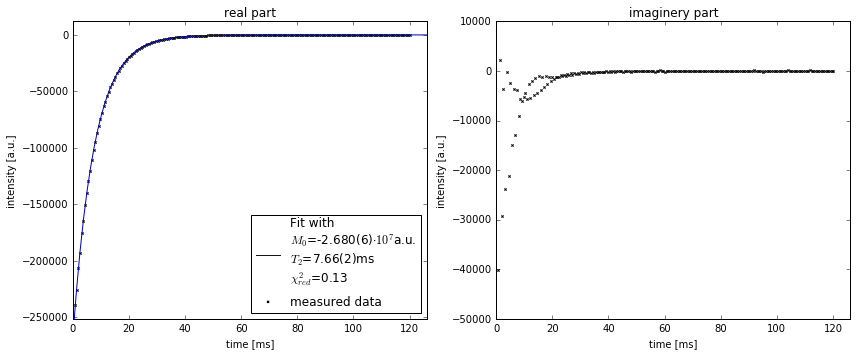

In [52]:
fig,ax = plt.subplots(1,2,figsize=(6*2,5))

i=0
x =np.linspace(0,max(data_2[i][0])*1.05,100)
ax[0].scatter(10**3*np.array(data_2[i][0]),data_2[i][1],marker='x',c='k',label='measured data',s=5)
        #ax[i//2][i%2].errorbar(10**3*np.array(data_2[i][0]),data_2[i][1],yerr=y_er,xerr=10**3*x_err,
        #               fmt='none',ecolor='k',label='measured data')
ax[0].plot(10**3*x,fun5(x,*opt_T2[i]),'mediumblue',label="""Fit with
$M_0$=%.3f(%.0f)$\cdot10^7$a.u.
$T_2$=%.2f(%.0f)ms
$\chi^2_{red}$=%.2f"""
                   %(opt_T2[i][0]*10**0,err_T2[i][0]*10**3,opt_T2[i][1]*10**1,
                    err_T2[i][1]*10**3,χ2_T2[i]))
ax[0].set_xlim(0,max(data_2[i][0])*1.05*10**3)
ax[0].set_ylim(min(data_2[i][1])*1.05,-0.05*min(data_2[i][1]))
ax[0].set_xlabel('time [ms]')
ax[0].set_ylabel('intensity [a.u.]')
ax[0].legend(loc=4)
ax[0].set_title('real part')
   
    #ax[i][1].plot(10**3*np.array(data_2[i][0]),data_2[i][2],marker='x',c='k',alpha=0.3)
ax[1].scatter(10**3*np.array(data_2[i][0]),data_2[i][2],marker='x',c='k',s=5)
ax[1].set_xlabel('time [ms]')
ax[1].set_ylabel('intensity [a.u.]')
ax[1].set_title('imaginery part')
ax[1].set_xlim(0,max(data_2[i][0])*1.05*10**3)
    
fig.tight_layout()
#fig.savefig('T2_c0.pdf')

In [53]:
def fun4(x,a,b):
    return a*x + b
opt3,cov3 = curve_fit(fun4,con[:-1],1/T2[:-1])
sigma3 = np.sqrt((ΔT2/T2**2)**2+(opt3[0]*Δcon)**2)
opt3,cov3 = curve_fit(fun4,con[:-1],1/T2[:-1],p0=[1,-0.005],sigma=(np.sqrt((ΔT2/T2**2)**2+(opt3[0]*Δcon)**2))[:-1],absolute_sigma =True)
err3 = np.sqrt(np.diag(cov3))
#print(opt2[1])
χ2_3 = sum([(1/T2[j]-fun4(con[j],*opt3))**2/sigma3[j]**2 
          for j in range(len(T2)-1)])/(len(T2)-3)
T20 = 1/opt3[1]
ΔT20 = err3[1] / opt3[1]**2
print(opt3,err3,'\n',T20,ΔT20,'\n',χ2_3)

[ 1.17096981 -0.01041166] [ 0.00724926  0.00072637] 
 -96.0462076189 6.7006896013 
 6.62817155022


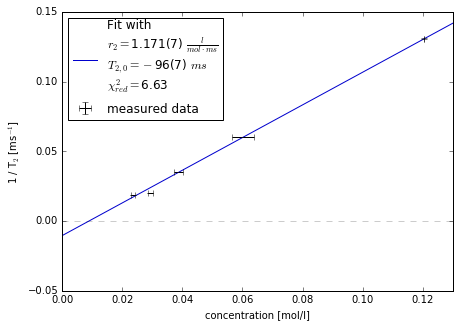

In [54]:
# plots
fig,ax = plt.subplots(figsize=(7,5))
x = np.linspace(-0.01,0.13,100)
ax.plot(x,fun4(x,*opt3),'mediumblue',label=r"""Fit with
$r_2=$%.3f(%.f) $\frac{l}{mol\cdot ms}$
$T_{2,0}=-$%.f(%.f) $ms$
$\chi^2_{red}=$%.2f"""%(opt3[0],err3[0]*10**3,-T20,ΔT20,χ2_3))
ax.errorbar(con[:-1],1/T2[:-1],ecolor='k',yerr=ΔT2[:-1]/T2[:-1]**2,xerr=Δcon[:-1],fmt='None',label='measured data')
ax.set_xlim(0,0.13)
ax.axvline(0,ls='--',c='k',alpha=0.2)
ax.axhline(0,ls='--',c='k',alpha=0.2)
#ax.set_ylim(0,max(data_cal[1])*1.1)
ax.set_xlabel('concentration [mol/l]')
ax.set_ylabel(r'1 / T$_2$ [ms$^{-1}$]')
ax.legend(loc=0)

#fig.savefig('T2vscon.pdf')

### MRI

In [108]:
curve_fit(fun5,RD,data_3[1][0],p0=[0.14,0],sigma=data_3[1][1])#,absolute_sigma=True)
#print(data_3[1][1],shit)

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Niklas\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 0.12846536,  0.        ]), array([[ inf,  inf],
        [ inf,  inf]]))

In [121]:
def fun5(x,M0,T1):
    return M0*10**7*(1-np.exp(-(x*10**-3)/T1))

opt_rd = np.zeros([3,2])
err_rd = np.zeros([3,2])
cov_rd = np.zeros([3,2,2])
χ2_rd = np.zeros([3])
for i in range(3):
    opt_rd[i],cov_rd[i] = curve_fit(fun5,RD,data_3[i][0],p0=[0.14,T1[[2,0,4][i]]],sigma=data_3[i][1],absolute_sigma=True)
    χ2_rd[i] = sum([(data_3[i][0][j]-fun5(RD[j],*opt_rd[i]))**2/data_3[i][1][j]**2 
          for j in range(len(RD))])/(len(RD)-3)
    err_rd[i]=np.sqrt(np.diag(cov_rd[i]))
print(opt_rd,'\n',T1,'\n',err_rd,χ2_rd)
print(np.rollaxis(err_rd,0,2)[1]*np.sqrt(χ2_rd),'\n',np.rollaxis(err_rd,0,2)[1])

[[  1.58613498e-01   5.67647647e+01]
 [  1.28465357e-01   2.35842576e+00]
 [  1.23008793e-01   1.70855447e+03]] 
 [    8.9924426     18.19421244    30.40741946    60.38703487    63.34347589
  2845.65864746] 
 [[  1.26432657e-04   1.26213557e-01]
 [             inf              inf]
 [  7.88513037e-04   1.88791323e+01]] [ 224.71089988   56.49354783  299.14020825]
[   1.89198668           inf  326.52724635] 
 [  0.12621356          inf  18.87913231]


C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\Niklas\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


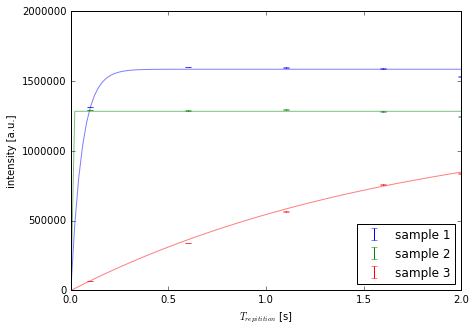

In [112]:
fig,ax = plt.subplots(figsize=(7,5))
x = np.linspace(0,2,100)
colours = ['b','g','r']
for i in range(3):
    ax.errorbar(RD*10**-6,data_3[i][0],yerr=data_3[i][1],fmt='none',label='sample %d'%(i+1),c=colours[i])
    ax.plot(x,fun5(x*10**6,*opt_rd[i]),c=colours[i],alpha=0.5)
ax.set_xlabel('$T_{repitition}$ [s]')
ax.set_ylabel('intensity [a.u.]')
ax.set_ylim(0,0.2*10**7)
ax.legend(loc=4)
#fig.savefig('IvsRd.pdf')

In [110]:
def fun6(x,M0,T2):
    return M0*10**7*np.exp(-x*10**-3/T2)

opt_t = np.zeros([3,2])
err_t = np.zeros([3,2])
cov_t = np.zeros([3,2,2])
χ2_t = np.zeros([3])
for i in range(3):
    opt_t[i],cov_t[i] = curve_fit(fun6,TAU,data_4[i][0],p0=[0.14,T2[[2,0,4][i]]],sigma=data_4[i][1],absolute_sigma=True)
    χ2_t[i] = sum([(data_4[i][0][j]-fun6(TAU[j],*opt_t[i]))**2/data_4[i][1][j]**2 
          for j in range(len(TAU))])/(len(TAU)-2)
    err_t[i]=np.sqrt(np.diag(cov_t[i]))
print(opt_t,'\n',T1,'\n',err_t,χ2_t)

[[  1.64714058e-01   2.07149588e+01]
 [  1.67151108e-01   3.47186641e+00]
 [  7.35741644e-02   7.57671651e+01]] 
 [    8.9924426     18.19421244    30.40741946    60.38703487    63.34347589
  2845.65864746] 
 [[  2.22840290e-04   4.83991962e-02]
 [  5.93870238e-04   1.18716912e-02]
 [  3.09187764e-05   4.22773364e-01]] [  42.06933669  240.96719457  748.19768532]


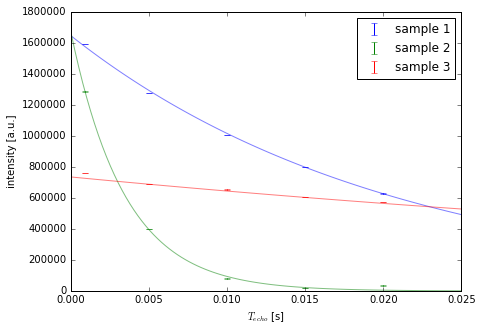

In [83]:
fig,ax = plt.subplots(figsize=(7,5))
x = np.linspace(0,0.025,100)
colours = ['b','g','r']
for i in range(3):
    ax.errorbar(TAU*10**-6,data_4[i][0],yerr=data_4[i][1],fmt='none',label='sample %d'%(i+1),c=colours[i])
    ax.plot(x,fun6(x*10**6,*opt_t[i]),c=colours[i],alpha=0.5)
ax.set_xlim(0,0.025)
ax.set_xlabel('$T_{echo}$ [s]')
ax.set_ylabel('intensity [a.u.]')
ax.legend()
#fig.savefig('IvsTau.pdf')